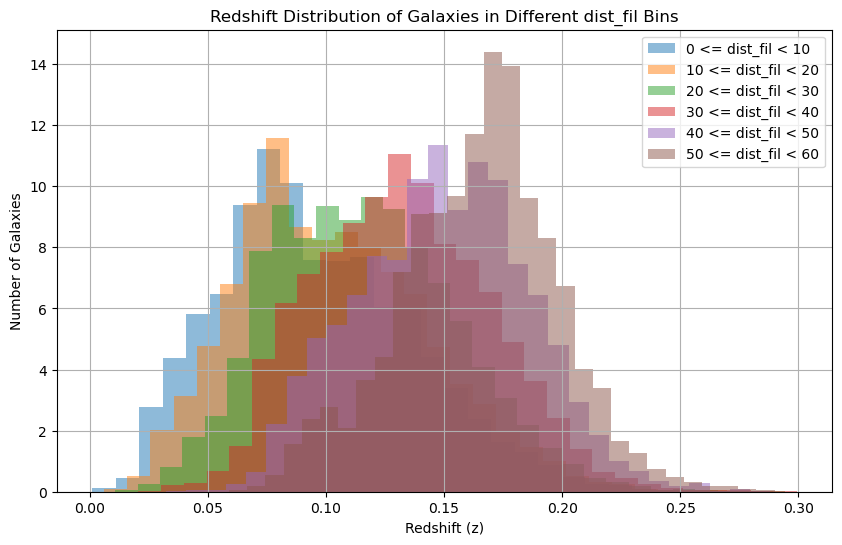

In [6]:
"""
I want to se the redshift distribution of galaxies in different dist_fil bins
"""

import numpy as np
import matplotlib.pyplot as plt
from astropy.cosmology import Planck18 as cosmo
from astropy.table import Table

def plot_redshift_distribution(data, dist_fil_bins, output_file):
    plt.figure(figsize=(10, 6))
    
    for i in range(len(dist_fil_bins)-1):
        bin_mask = (data['dist_fil'] >= dist_fil_bins[i]) & (data['dist_fil'] < dist_fil_bins[i+1])
        redshifts = data['red'][bin_mask]
        
        plt.hist(redshifts, bins=30, alpha=0.5, label=f'{dist_fil_bins[i]} <= dist_fil < {dist_fil_bins[i+1]}', \
                 density=True, histtype='stepfilled')
    
    plt.xlabel('Redshift (z)')
    plt.ylabel('Number of Galaxies')
    plt.title('Redshift Distribution of Galaxies in Different dist_fil Bins')
    plt.legend()
    plt.grid()
    plt.savefig(output_file)
    plt.show()

def main():
    # Load your data (replace 'your_data_file.fits' with your actual data file)
    data = Table.read("../data/sdss_dr72safe0_zmin_0.000_zmax_0.300_sigma_5.0.csv")
    data = data[data['gr'] > 0.8]  # Filter out galaxies with z >= 0.3

    # Define dist_fil bins (you can adjust these bins as needed)
    dist_fil_bins = [0, 10, 20, 30, 40, 50, 60]  # Example bins in Mpc
    
    # Plot the redshift distribution
    plot_redshift_distribution(data, dist_fil_bins, 'redshift_distribution.png')
if __name__ == "__main__":
    main()
